# Introduction

Topic modeling is an unsupervised learning for discovering topics in a collection of documents. Since, climate change consists of vast range of topics, we decided to discover key underlying topics that occur with climate change such as heatwaves, water shortage, GHG and much more. We have used the most common tool for topic modeling: Latent Dirichlet Allocation (LDA). 

<b>Working of LDA model</b>\
LDA helps in discovering hidden topics from the collection of documents and is based on the assumption that each documents(tweets in our case) are composed of words which assists in determining the topics. It basically maps each tweet to a topic list by assigning each word to different topics and after assigning the probabilities to each word, top "r" probability words are chosen to determine the topic.

We built LDA model on our previously cleaned data with 5 topics where each topic is a combination of keywords and each word contributes to a certain weightage in the topic. However, we also explored the better version of LDA models: Mallet version and also found some interesting topics.

*References*
* https://www.mygreatlearning.com/blog/understanding-latent-dirichlet-allocation/#:~:text=LDA%20assumes%20that%20documents%20are,the%20document%20to%20different%20topics.&text=It%20treats%20documents%20just%20as,for%20topic%20assignment%20to%20words.
* https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#12buildingthetopicmodel

#### Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from pprint import pprint
from gensim.models.ldamodel import LdaModel
import re, nltk, spacy, gensim
import matplotlib.pyplot as plt
import spacy
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora
from gensim.corpora import Dictionary
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import os

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sanyaanand/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Read the data set

In [2]:
data = pd.read_csv('./cleaned_data.csv')
data.sample(5)

,date,id,tweets_text,clean_txt,clean_words_text,tweet_length
388,2021-05-06 21:18:32,1.390416e+18,@elonmusk People with a multi generation time ...,elonmusk people with a multi generation time h...,elonmusk people multi generation time horizon ...,204
8378,2021-05-06 02:59:37,1.390139e+18,Children are being rented and cartels are char...,children are being rented and cartels are char...,child rented cartel charging thousand smuggle ...,212
739,2021-05-06 20:41:22,1.390406e+18,@BlakeRichardsMP I pray daily that the brain d...,blakerichardsmp i pray daily that the brain de...,blakerichardsmp pray daily brain dead policy g...,262
2020,2021-05-06 18:17:17,1.390370e+18,CEB Webinar Health and Climate Change #Climate...,ceb webinar health and climate change climatec...,ceb webinar health health via,62
4290,2021-05-06 14:30:43,1.390313e+18,Does a region as highly reputed as St-Emilion ...,does a region as highly reputed as stemilion n...,region highly reputed stemilion need there gro...,200


In [3]:
# check if the clean_words_text has na values
print(data['clean_words_text'].isna().sum())

2


In [4]:
# fill na
data['clean_words_text']=data['clean_words_text'].fillna("")

#### Requirement for LDA - Tokenise words

In [5]:
# tokenise cleaned_words
data['tokenized_text'] = data['clean_words_text'].apply(word_tokenize) 

#create dictionary
text_dict = Dictionary(data['clean_words_text'].str.split())
tweets_bow = [text_dict.doc2bow(tweet) for tweet in data['tokenized_text']]
tokens = [tweet for tweet in data['tokenized_text']]
data2 = data['clean_words_text'].tolist()

### LDA Model

The LDA model is built with 5 different topics where each keyword in the topic contributes to a certain weightage in the topic. The model outputs 10 keywords for each topic and their respective importance.

In [6]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=tweets_bow,
                                           id2word=text_dict,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [7]:
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('action', 0.01677127),
   ('take', 0.01586755),
   ('fight', 0.014079804),
   ('support', 0.011286235),
   ('border', 0.010838175),
   ('act', 0.010805121),
   ('farmer', 0.009806703),
   ('would', 0.008920186),
   ('vital', 0.008784094),
   ('real', 0.008613096)]),
 (1,
  [('government', 0.013819106),
   ('five', 0.0126535),
   ('well', 0.012128598),
   ('state', 0.011133854),
   ('warming', 0.011023487),
   ('america', 0.010459921),
   ('nothing', 0.009902865),
   ('day', 0.0096916575),
   ('child', 0.0090487),
   ('million', 0.008871582)]),
 (2,
  [('time', 0.026263963),
   ('since', 0.011532521),
   ('better', 0.010595693),
   ('australia', 0.009661296),
   ('environmental', 0.009239762),
   ('economy', 0.008866193),
   ('project', 0.008267285),
   ('important', 0.008038331),
   ('resilience', 0.007930402),
   ('natural', 0.007914007)]),
 (3,
  [('amp', 0.013928435),
   ('people', 0.012068993),
   ('u', 0.011475667),
   ('like', 0.010802286),
   ('world', 0.009346123),
   

#### Topic Summarisation

**Topic 0** is  represented as follows and has 10 keywords contributing to it:
('action', 0.01677127),
('take', 0.01586755),
('fight', 0.014079804),
('support', 0.011286235),
('border', 0.010838175),
('act', 0.010805121),
('farmer', 0.009806703),
('would', 0.008920186),
('vital', 0.008784094),
('real', 0.008613096). 

Based on the above results, we can summarise each topic as follows:
* <b>Topic 0 -</b> Supporting Farmers or Fighting Climate change
* <b>Topic 1 -</b> Warming in America
* <b>Topic 2 -</b> Environment of Australia
* <b>Topic 3 -</b> Climate Change- Ain't my problem
* <b>Topic 4 -</b> Threat to planet

In [8]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokens, dictionary=text_dict, coherence='c_v',topn=60)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.49355415902724803


#### Visualising the Topics 

Values of lambda that are very close to zero will show terms that are more specific for a chosen topic. Meaning that we will see terms that are "important" for that specific topic but not necessarily "important" for the whole corpus. Values of lambda that are very close to one will show those terms that have the highest ratio between frequency of the terms for that specific topic and the overall frequency of the terms from the corpus. The larger the bubble, the more prevalent is that topic. We predict the topic 1 to be more prevalent.

In [9]:
# visualise the topics model
pyLDAvis.enable_notebook()

vis = gensimvis.prepare(lda_model, tweets_bow, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.346011  0.059487       1        1  46.917733
0      0.150712  0.290211       2        1  24.185384
4      0.067457 -0.118456       3        1  10.331778
1      0.072213 -0.138718       4        1  10.306604
2      0.055630 -0.092524       5        1   8.258501, topic_info=        Term        Freq       Total Category  logprob  loglift
320   action  618.000000  618.000000  Default  30.0000  30.0000
632     time  331.000000  331.000000  Default  29.0000  29.0000
291     take  585.000000  585.000000  Default  28.0000  28.0000
465      amp  996.000000  996.000000  Default  27.0000  27.0000
471    fight  519.000000  519.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
215    local   52.915497   53.645789   Topic5  -5.4715   2.4802
2058  damage   53.325680   54.072291   Topic5  -5.4637   2.4800
90      list   50.989360   51.729615   Topic5  -5.5085   2.4795
334      add   49.475897   50.213388   Topic5  -5.5387   2.4791
1289  wealth   51.104985   51.867254   Topic5  -5.5063   2.4791

[185 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
515       2  0.997691         act
320       2  0.998726      action
209       5  0.993599  adaptation
334       5  0.975835         add
574       4  0.986264      affect
...     ...       ...         ...
65        3  0.987714       worse
166       2  0.998589       would
25        1  0.998229        year
965       3  0.987302         yes
514       5  0.985930       youre

[160 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 2, 3])

# LDA Mallet Model

To improve the above LDA model, we explored other version of LDA model: Mallet’s version which provides better quality of topics. It is an
open source toolkit and is a Java based package widely used for topic modeling. 

In [10]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = './mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=tweets_bow, num_topics=5, id2word = text_dict,random_seed=100,alpha=100)

#### Topic Summarisation

Based on the below results, we can summarise each topic as follows:
* <b>Topic 0 -</b> Climate Change- Ain't my problem 
* <b>Topic 1 -</b> Fight against Carbon Emissions or Global Carbon Emissions
* <b>Topic 2 -</b> Future of Planet Earth
* <b>Topic 3 -</b> Green Energy
* <b>Topic 4 -</b> World Crisis

LDA Mallet Model is considered to be a better version of LDA algorithm for discovering hidden topics. Therefore, we prefer to select Mallet model over Simple LDA model and hence, will be using it for further analysis.

In [11]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('amp', 0.04333165381186776),
   ('crisis', 0.015697066005193598),
   ('health', 0.011317390798806249),
   ('work', 0.010464710670129065),
   ('today', 0.009418239603116158),
   ('policy', 0.00852680128677183),
   ('read', 0.008333010348436106),
   ('human', 0.007209022906088911),
   ('pandemic', 0.007209022906088911),
   ('border', 0.007053990155420332)]),
 (1,
  [('action', 0.01769877231710623),
   ('fight', 0.01533635413035901),
   ('impact', 0.015258897796367297),
   ('carbon', 0.014523062623446032),
   ('real', 0.013051392277603501),
   ('thing', 0.012586654273653228),
   ('act', 0.009527129080980598),
   ('food', 0.009410944579993029),
   ('community', 0.0089074784090469),
   ('plan', 0.008830022075055188)]),
 (2,
  [('people', 0.0346444487502422),
   ('time', 0.022282503390815733),
   ('support', 0.013253245495059096),
   ('life', 0.012749467157527611),
   ('future', 0.011625653943034296),
   ('environment', 0.010424336368920753),
   ('day', 0.009184266614997093),
   ('p

In [12]:
pyLDAvis.enable_notebook()  
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)
vis = gensimvis.prepare(model, tweets_bow, dictionary=model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.292560  0.211473       1        1  20.133043
3      0.293259  0.178639       2        1  20.010178
2     -0.198058 -0.136160       3        1  19.976497
4      0.115512  0.097994       4        1  19.945707
1      0.081848 -0.351946       5        1  19.934575, topic_info=              Term         Freq        Total Category  logprob  loglift
465            amp  1329.000000  1329.000000  Default  30.0000  30.0000
97          people  1054.000000  1054.000000  Default  29.0000  29.0000
165          world   841.000000   841.000000  Default  28.0000  28.0000
632           time   678.000000   678.000000  Default  27.0000  27.0000
147         global   631.000000   631.000000  Default  26.0000  26.0000
..             ...          ...          ...      ...      ...      ...
618           plan   268.211124   270.570263   Topic5  -4.7296   1.6040
564  environmental   199.981979   202.324049   Topic5  -5.0231   1.6011
286        problem   251.742020   259.939265   Topic5  -4.7930   1.5807
567            job   198.805614   204.703461   Topic5  -5.0290   1.5835
328       solution   225.861999   289.568173   Topic5  -4.9014   1.3642

[330 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
515       5  0.998667       act
320       5  1.000747    action
258       1  0.992433  activist
1529      5  0.998154   address
574       2  1.003662    affect
...     ...       ...       ...
65        5  1.001025     worse
633       4  1.000936     worst
257       1  0.989464     worth
25        2  1.000045      year
514       2  1.002503     youre

[334 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 5, 2])

In [13]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=tokens, dictionary=text_dict, coherence='c_v',topn=60)
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.43905954081390164


### Finding Dominant Topic - LDA Mallet model
It is intriguing to find which of the 5 topics are dominant among all the tweets. Hence, we tried to discover the dominant topic and also, predicted them.

In [14]:
# function for dominant topics
def format_topics_sentences(ldamodel=lda_model, corpus=tweets_bow, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


In [15]:
# using Simple LDA model
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamallet, corpus=tweets_bow, texts=data2)

In [16]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.2167,"people, time, support, life, future, environme...",part animal welfare issue alone sufficient man...
1,1,2.0,0.2727,"people, time, support, life, future, environme...",joe biden mention racial justice national day ...
2,2,0.0,0.2050,"amp, crisis, health, work, today, policy, read...",kaciekkart make sense
3,3,3.0,0.2297,"year, dont, make, energy, issue, green, im, go...",nothing backdoor communist democrat party push...
4,4,1.0,0.2286,"action, fight, impact, carbon, real, thing, ac...",fever plaguing ocean making worse
5,5,2.0,0.2727,"people, time, support, life, future, environme...",joe biden mention racial justice national day ...
6,6,2.0,0.2174,"people, time, support, life, future, environme...",lake charles la today joe biden immediately st...
7,7,3.0,0.2271,"year, dont, make, energy, issue, green, im, go...",newsmax trishregan oh think coffee lover lol o...
8,8,3.0,0.2367,"year, dont, make, energy, issue, green, im, go...",somehow im supposed onboard cutting beef diet ...
9,9,1.0,0.2212,"action, fight, impact, carbon, real, thing, ac...",cold front move thru area


#### Grouping top 5 sentences under each topic
The tabular output below actually has 5 rows, one each for a topic. It has the topic number, the keywords, and the most representative document. The Perc_Contribution column is the contribution percentage of the topic in the given document.

In [17]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.4293,"amp, crisis, health, work, today, policy, read...",swcrisis sueytonius hfjohnsen andrygiles robho...
1,1.0,0.3250,"action, fight, impact, carbon, real, thing, ac...",welcome ecofriendlies today everyones favorite...
2,2.0,0.3277,"people, time, support, life, future, environme...",elonmusk people multi generation time horizon ...
3,3.0,0.3219,"year, dont, make, energy, issue, green, im, go...",msm great counterindicatoreat vegetable gt veg...
4,4.0,0.3223,"world, global, emission, country, warming, rep...",scientist wednesday reported another reason wo...


#### Distribution of tweets amongst the 5 predicted topics

To judge how widely a topic was discussed, we tried to understand the volume and distribution of topics.

In [18]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head()

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,2.0,"people, time, support, life, future, environme...",2105.0,0.2105
1.0,2.0,"people, time, support, life, future, environme...",2046.0,0.2046
2.0,0.0,"amp, crisis, health, work, today, policy, read...",1824.0,0.1824
3.0,3.0,"year, dont, make, energy, issue, green, im, go...",2059.0,0.2059
4.0,1.0,"action, fight, impact, carbon, real, thing, ac...",1966.0,0.1966


#### Contribution of each Topic
As we can clearly see, <i><b>Topic 0: "Climate change - Ain't my Problem"</b></i> has contributed the most among all the other 5 topics. Since, "Climate Change - Ain't my Problem" is the dominant topic, it is strange to conclude that majority of people in our dataset are not bothered about climate change.

Text(0.5, 1.0, 'Topic Percentage Contribution')

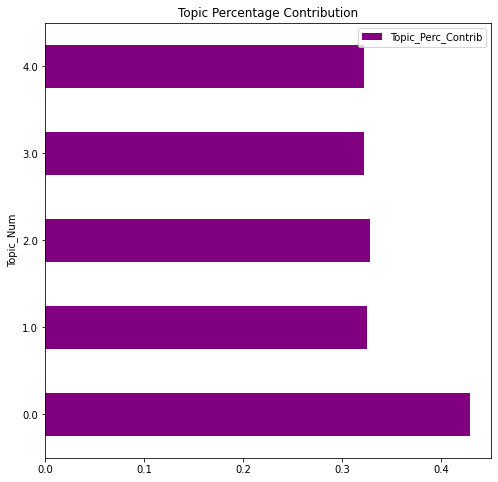

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
sent_topics_sorteddf_mallet.plot.barh(x='Topic_Num',
                      y='Topic_Perc_Contrib',
                      ax=ax,
                      color="purple")

ax.set_title("Topic Percentage Contribution")